<a href="https://colab.research.google.com/github/AliBank/VGG16---Derin-renme/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install -q keras
!pip install h5py pyyaml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
from keras.models import Sequential
from keras.layers import Dense
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
from glob import glob
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.layers import Flatten
from tensorflow.keras.layers import Conv2D, AveragePooling2D, GlobalAveragePooling2D
from keras.utils import to_categorical
import cv2
import numpy as np
from __future__ import absolute_import, division, print_function
import os
import tensorflow as tf
from tensorflow import keras

In [4]:
train_path="/content/drive/MyDrive/BaklagilDataSet/DB3_Histeq/fold1/train/images/"
test_path="/content/drive/MyDrive/BaklagilDataSet/DB3_Histeq/fold1/test/images/"

In [5]:
img = load_img(train_path + "badem_ici/0003012210001_WIN_20220513_10_31_08_Pro.jpg")

TypeError: ignored

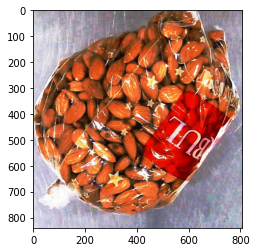

In [6]:
plt.imshow(img)
plt.axes("off")
plt.show()

In [7]:
x=img_to_array(img)
print(x.shape)

(840, 808, 3)


In [8]:
numberOfClass=len(glob(train_path+"/*"))

In [9]:
print(numberOfClass)

30


In [10]:
vgg= VGG16()

553467096/553467096 [==============================] - 20s 0us/step


In [11]:
print(vgg.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
print(type(vgg))

<class 'keras.engine.functional.Functional'>


In [13]:
vgg_layer_list= vgg.layers
print(vgg_layer_list)

[<keras.engine.input_layer.InputLayer object at 0x7f72adcb6a60>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f72adcadca0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f72adcadc10>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f72adcadb50>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f72ad7f64f0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f72ad7f6760>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f72a7a37ca0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f72a7a37cd0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f72a7a37790>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f72adc957c0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f72babba2e0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f72ab76eb80>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f72ad7f6910>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f72a7a50340>, <keras.layers.poo

In [14]:
model= Sequential()
for i in range(len(vgg_layer_list)-1):  
    model.add(vgg_layer_list[i])

print(model.summary())    


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [15]:
for layers in model.layers:
    layers.trainable = False

In [16]:
model.add(Dense(numberOfClass, activation="softmax"))

In [17]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [18]:
from keras.optimizers.optimizer_v2.rmsprop import RMSProp
optim_1 = RMSProp(lr=0.0001)
model.compile(loss="categorical_crossentropy", optimizer=optim_1, metrics=["accuracy"])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [19]:
#train
train_data= ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224))
test_data= ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224))

Found 3601 images belonging to 30 classes.
Found 900 images belonging to 30 classes.


In [20]:
batch_size=50

In [21]:
from keras.callbacks import ModelCheckpoint,CSVLogger
filepath="/content/drive/MyDrive/saved_models/weights-improvementVgg16-{epoch:05d}.ckpt"
checkpoint= ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=False,save_freq=5*72, mode='max')
#log_csv =CSVLogger('my_logs.csv', separator=',', append=False)
callbacks_list =[checkpoint]

In [ ]:
hist=model.fit_generator(train_data,
                         steps_per_epoch=3600//batch_size,
                         epochs=100,
                         validation_data= test_data,
                         validation_steps = 900//batch_size )

<ipython-input-23-69e4907365a4>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=model.fit_generator(train_data,


Epoch 1/100
72/72 [==============================] - 1579s 22s/step - loss: 3.0226 - accuracy: 0.2595 - val_loss: 1.9370 - val_accuracy: 0.4167
Epoch 2/100
72/72 [==============================] - 1538s 21s/step - loss: 1.4735 - accuracy: 0.5491 - val_loss: 1.2049 - val_accuracy: 0.6424
Epoch 3/100
72/72 [==============================] - 1533s 21s/step - loss: 0.9009 - accuracy: 0.7023 - val_loss: 0.9601 - val_accuracy: 0.6875
Epoch 4/100
72/72 [==============================] - 1526s 21s/step - loss: 0.6843 - accuracy: 0.7778 - val_loss: 0.7664 - val_accuracy: 0.7517
Epoch 5/100
72/72 [==============================] - 1533s 21s/step - loss: 0.5195 - accuracy: 0.8384 - val_loss: 0.7214 - val_accuracy: 0.7726
Epoch 6/100
72/72 [==============================] - 1532s 21s/step - loss: 0.4098 - accuracy: 0.8759 - val_loss: 0.6159 - val_accuracy: 0.7778
Epoch 7/100
72/72 [==============================] - 1525s 21s/step - loss: 0.3537 - accuracy: 0.8807 - val_loss: 0.5949 - val_accuracy:

In [22]:
hist=model.fit_generator(train_data,
                         steps_per_epoch=3600//batch_size,
                         epochs=15,
                         initial_epoch=0,
                         validation_data= test_data,
                         validation_steps = 900//batch_size,
                         callbacks=callbacks_list)

<ipython-input-22-35ef008a8f75>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=model.fit_generator(train_data,


Epoch 1/15
30/72 [===========>..................] - ETA: 16:24 - loss: 3.9361 - accuracy: 0.1010

KeyboardInterrupt: ignored

In [ ]:
model.load_weights("/content/drive/MyDrive/saved_models/weights-improvementVgg16-00015.ckpt")

In [ ]:
hist=model.fit_generator(train_data,
                         steps_per_epoch=3600//batch_size,
                         epochs=25,
                         initial_epoch=15,
                         validation_data= test_data,
                         validation_steps = 900//batch_size,
                         callbacks=callbacks_list)

In [ ]:
model.load_weights("/content/drive/MyDrive/saved_models/weights-improvementVgg16-00025.ckpt")

In [ ]:
hist=model.fit_generator(train_data,
                         steps_per_epoch=3600//batch_size,
                         epochs=40,
                         initial_epoch=25,
                         validation_data= test_data,
                         validation_steps = 900//batch_size,
                         callbacks=callbacks_list)

In [ ]:
model.load_weights("/content/drive/MyDrive/saved_models/weights-improvementVgg16-00040.ckpt")

In [ ]:
hist=model.fit_generator(train_data,
                         steps_per_epoch=3600//batch_size,
                         epochs=50,
                         initial_epoch=40,
                         validation_data= test_data,
                         validation_steps = 900//batch_size,
                         callbacks=callbacks_list)

In [ ]:
model.load_weights("/content/drive/MyDrive/saved_models/weights-improvementVgg16-00050.ckpt")

In [ ]:
hist=model.fit_generator(train_data,
                         steps_per_epoch=3600//batch_size,
                         epochs=65,
                         initial_epoch=50,
                         validation_data= test_data,
                         validation_steps = 900//batch_size,
                         callbacks=callbacks_list)

In [ ]:
model.load_weights("/content/drive/MyDrive/saved_models/weights-improvementVgg16-00065.ckpt")

In [ ]:
hist=model.fit_generator(train_data,
                         steps_per_epoch=3600//batch_size,
                         epochs=90,
                         initial_epoch=65,
                         validation_data= test_data,
                         validation_steps = 900//batch_size,
                         callbacks=callbacks_list)

In [ ]:
model.load_weights("/content/drive/MyDrive/saved_models/weights-improvementVgg16-00090.ckpt")

In [ ]:
hist=model.fit_generator(train_data,
                         steps_per_epoch=3600//batch_size,
                         epochs=100,
                         initial_epoch=90,
                         validation_data= test_data,
                         validation_steps = 900//batch_size,
                         callbacks=callbacks_list)

In [ ]:
model.load_weights("/content/drive/MyDrive/saved_models/weights-improvementVgg16-000100.ckpt")

In [ ]:
model.save_weights("BaklagilFold1RMSProplr0.0001VGG16")